In [9]:
!pip install pandas numpy networkx matplotlib seaborn

Strategic Social Network - ROAM Heuristic Implementation:

Original Network Statistics:
Network Statistics:
  Nodes: 64
  Edges: 243
  Density: 0.1205
  Average Clustering: 0.6223
  Average Path Length: 2.6910

Identified Leader: Node 0
Original leader rankings: {'degree': 1, 'closeness': 1, 'betweenness': 2}

------

Applying ROAM with budget 2:

ROAM Iteration 1
Step 1: Removing edge between leader 0 and node 2.
Step 2: Adding 1 edges from node 2.
  Added edge: 2 -> 5
Leader 0 rankings after iteration 1: {'degree': 1, 'closeness': 1, 'betweenness': 2}.

ROAM Iteration 2
Step 1: Removing edge between leader 0 and node 6.
Step 2: Adding 1 edges from node 6.
  Added edge: 6 -> 1
Leader 0 rankings after iteration 2: {'degree': 1, 'closeness': 2, 'betweenness': 2}.

ROAM Iteration 3
Step 1: Removing edge between leader 0 and node 9.
Step 2: Adding 1 edges from node 9.
  Added edge: 9 -> 1
Leader 0 rankings after iteration 3: {'degree': 2, 'closeness': 2, 'betweenness': 3}.

Summary for Bu

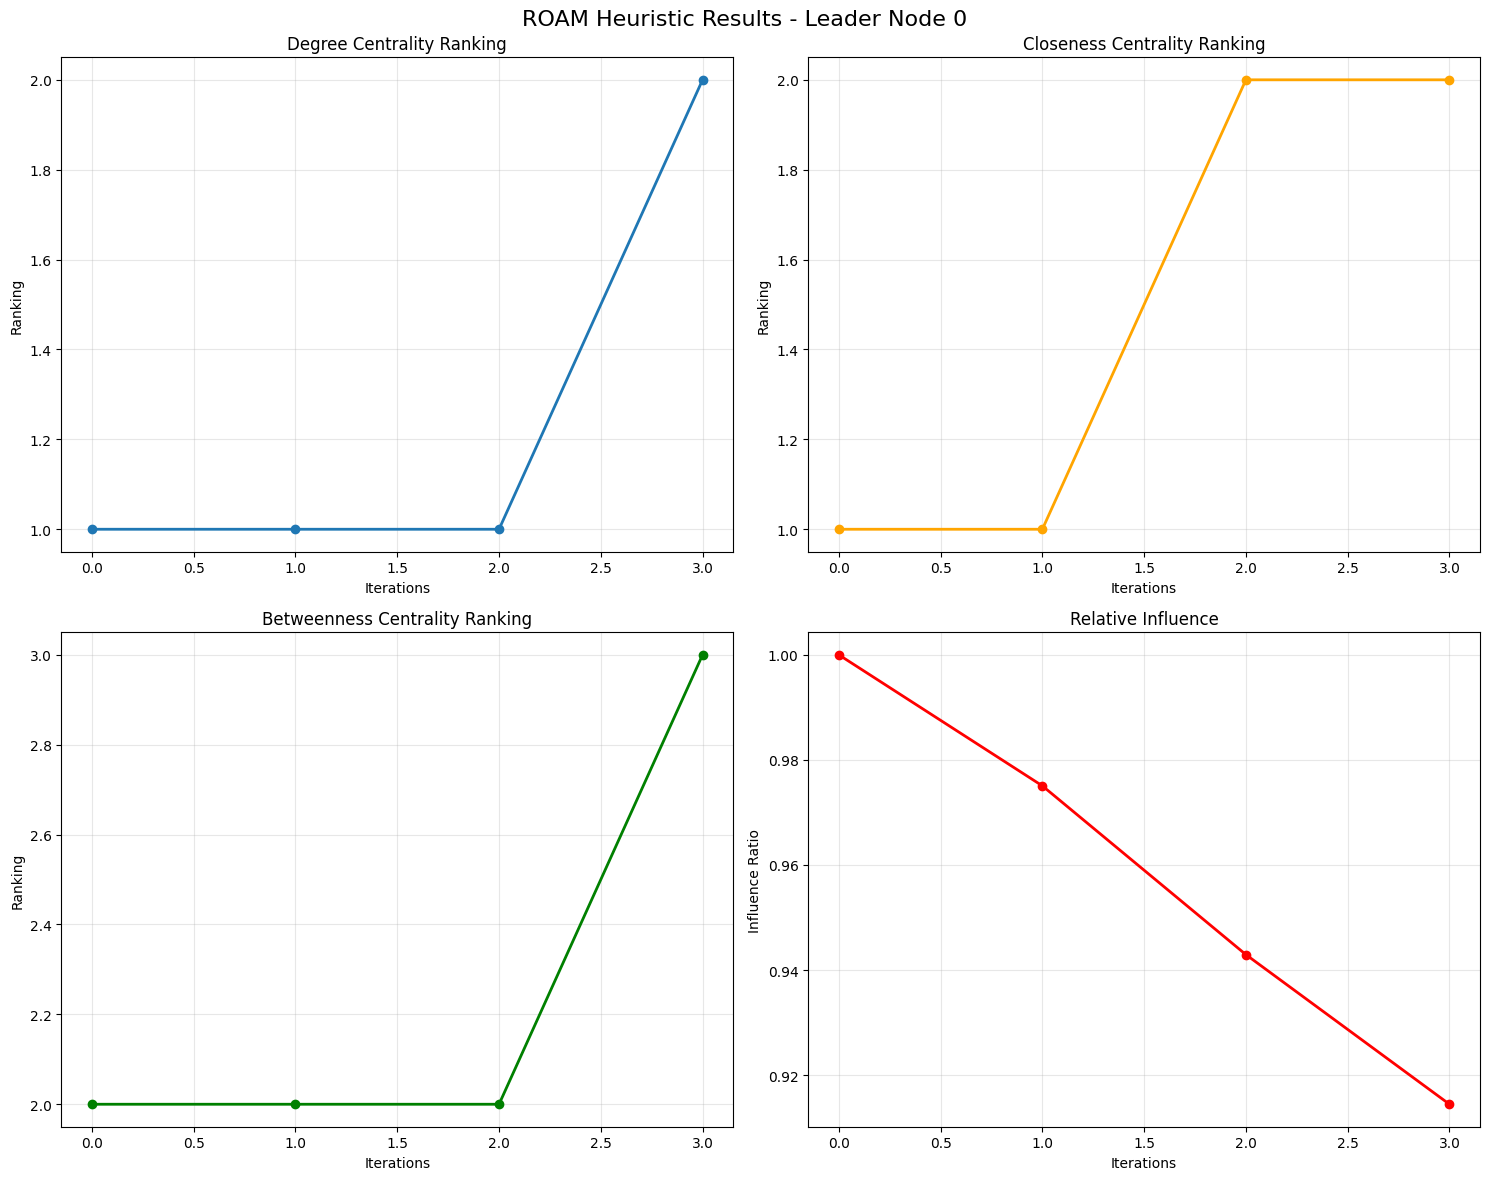

Applying ROAM with budget 3:

ROAM Iteration 1
Step 1: Removing edge between leader 0 and node 2.
Step 2: Adding 2 edges from node 2.
  Added edge: 2 -> 5
  Added edge: 2 -> 26
Leader 0 rankings after iteration 1: {'degree': 1, 'closeness': 1, 'betweenness': 2}.

ROAM Iteration 2
Step 1: Removing edge between leader 0 and node 6.
Step 2: Adding 2 edges from node 6.
  Added edge: 6 -> 1
  Added edge: 6 -> 3
Leader 0 rankings after iteration 2: {'degree': 2, 'closeness': 2, 'betweenness': 3}.

ROAM Iteration 3
Step 1: Removing edge between leader 0 and node 9.
Step 2: Adding 2 edges from node 9.
  Added edge: 9 -> 1
  Added edge: 9 -> 3
Leader 0 rankings after iteration 3: {'degree': 2, 'closeness': 2, 'betweenness': 3}.

Summary for Budget 3:
Final degree ranking: 2
Final closeness ranking: 2
Final betweenness ranking: 3
Final influence ratio: 0.9074


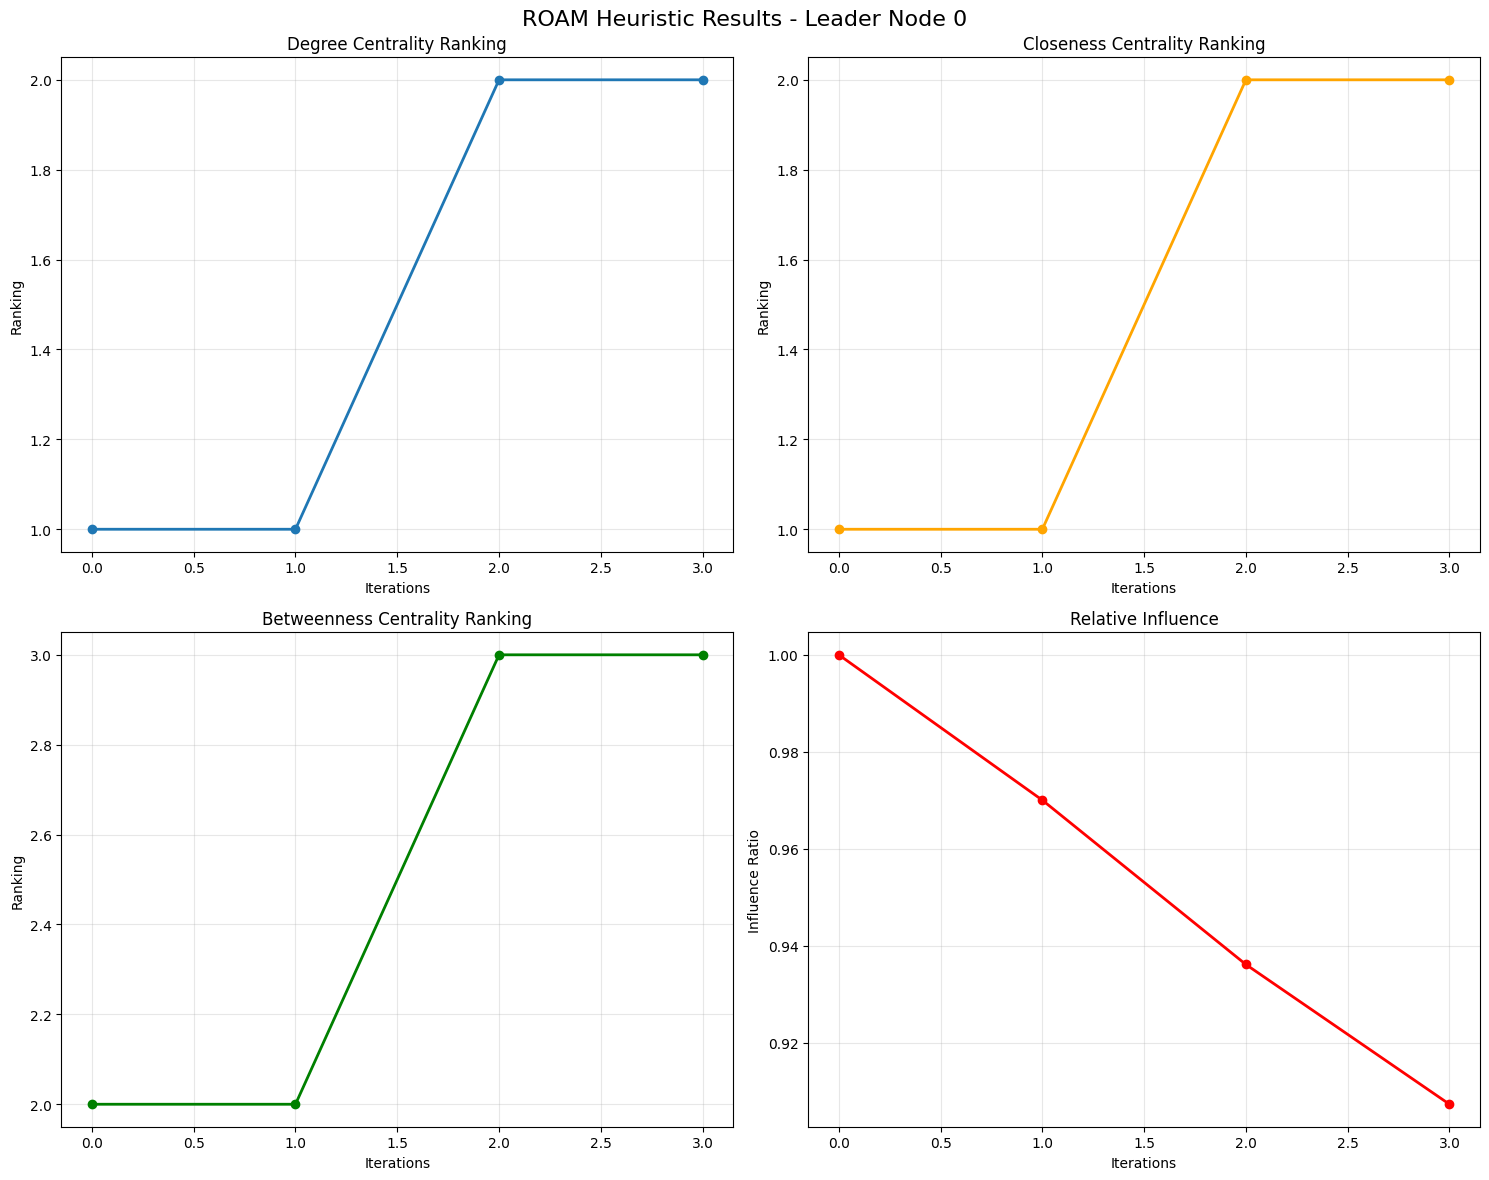

Applying ROAM with budget 4:

ROAM Iteration 1
Step 1: Removing edge between leader 0 and node 2.
Step 2: Adding 2 edges from node 2.
  Added edge: 2 -> 5
  Added edge: 2 -> 26
Leader 0 rankings after iteration 1: {'degree': 1, 'closeness': 1, 'betweenness': 2}.

ROAM Iteration 2
Step 1: Removing edge between leader 0 and node 6.
Step 2: Adding 3 edges from node 6.
  Added edge: 6 -> 1
  Added edge: 6 -> 3
  Added edge: 6 -> 4
Leader 0 rankings after iteration 2: {'degree': 2, 'closeness': 2, 'betweenness': 3}.

ROAM Iteration 3
Step 1: Removing edge between leader 0 and node 9.
Step 2: Adding 3 edges from node 9.
  Added edge: 9 -> 1
  Added edge: 9 -> 3
  Added edge: 9 -> 4
Leader 0 rankings after iteration 3: {'degree': 2, 'closeness': 2, 'betweenness': 3}.

Summary for Budget 4:
Final degree ranking: 2
Final closeness ranking: 2
Final betweenness ranking: 3
Final influence ratio: 0.9054


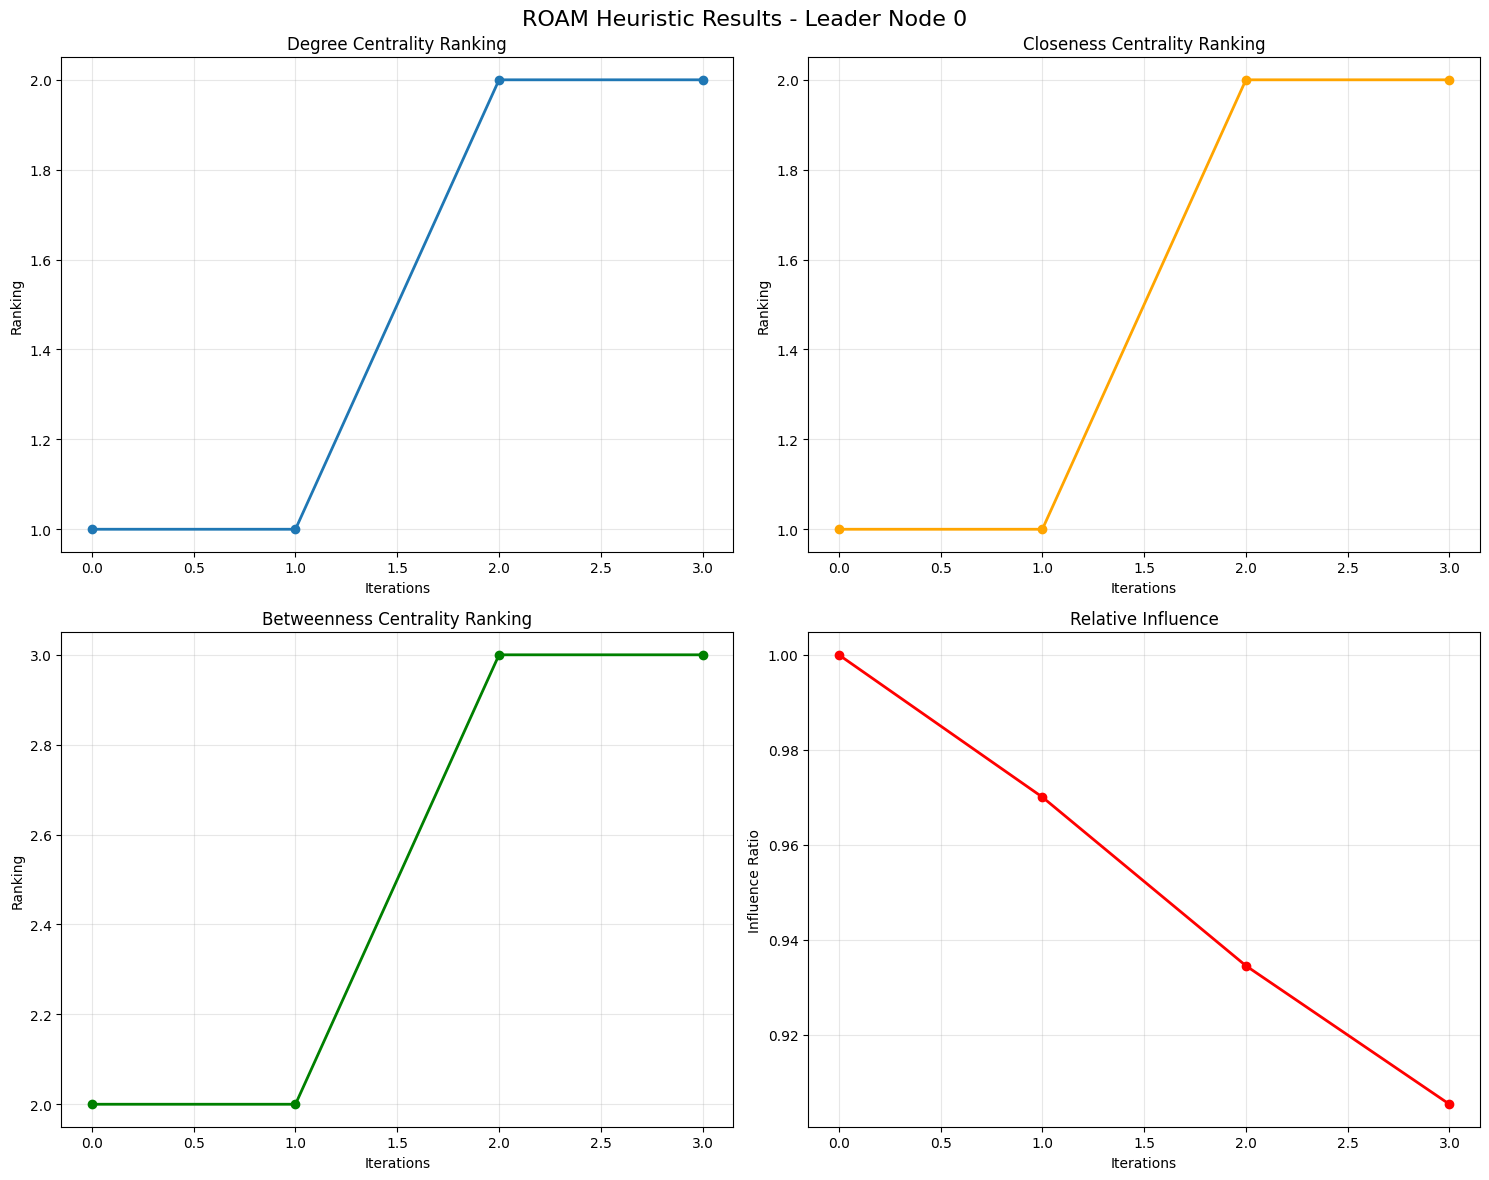

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Set
import ast
class StrategicSocialNetworkAnalysis:
    def __init__(self, edges_file: str, nodes_file: str):
        self.edges_df = pd.read_csv(edges_file)
        self.nodes_df = pd.read_csv(nodes_file)        
        self.nodes_df.columns = self.nodes_df.columns.str.strip().str.lstrip('#').str.strip()
        self.edges_df.columns = self.edges_df.columns.str.strip().str.lstrip('#').str.strip()
        self.graph = self._build_graph()
        self.original_graph = self.graph.copy()
    def _build_graph(self) -> nx.Graph:
        G = nx.Graph()
        for _, row in self.nodes_df.iterrows():
            node_id = row['index']
            pos_str = str(row['_pos']).strip()
            try:
                if pos_str.startswith('array('):
                    pos_str = pos_str.replace('array(', '').replace(')', '')                
                pos_str = pos_str.strip('[]')
                pos = [float(x.strip()) for x in pos_str.split(',')]
            except (ValueError, AttributeError) as e:
                print(f"Warning: Could not parse position for node {node_id}: {pos_str}.")
                pos = [0.0, 0.0]  
            G.add_node(node_id, pos=pos)        
        for _, row in self.edges_df.iterrows():
            G.add_edge(row['source'], row['target'], weight=row['weight'])
        return G
    def calculate_centrality_measures(self, graph: nx.Graph = None) -> Dict[str, Dict]:
        if graph is None:
            graph = self.graph 
        centralities = {
            'degree': nx.degree_centrality(graph),
            'closeness': nx.closeness_centrality(graph),
            'betweenness': nx.betweenness_centrality(graph)
        }
        return centralities
    def calculate_influence_scores(self, graph: nx.Graph = None) -> Dict[int, float]:
        if graph is None:
            graph = self.graph
        centralities = self.calculate_centrality_measures(graph)
        influence_scores = {}
        for node in graph.nodes():
            influence = (
                centralities['degree'].get(node, 0) * 0.4 +
                centralities['closeness'].get(node, 0) * 0.3 +
                centralities['betweenness'].get(node, 0) * 0.3
            )
            influence_scores[node] = influence
        return influence_scores    
    def identify_leader(self, graph: nx.Graph = None) -> int:
        if graph is None:
            graph = self.graph
        centralities = self.calculate_centrality_measures(graph)        
        rankings = {}
        for measure in centralities:
            sorted_nodes = sorted(centralities[measure].items(), 
                                key=lambda x: x[1], reverse=True)
            rankings[measure] = {node: rank for rank, (node, _) in enumerate(sorted_nodes)}        
        ranking_sums = {}
        for node in graph.nodes():
            ranking_sum = sum(rankings[measure].get(node, len(graph)) 
                            for measure in rankings)
            ranking_sums[node] = ranking_sum
        leader = min(ranking_sums.items(), key=lambda x: x[1])[0]
        return leader
    def get_node_rankings(self, node: int, graph: nx.Graph = None) -> Dict[str, int]:
        if graph is None:
            graph = self.graph            
        centralities = self.calculate_centrality_measures(graph)
        rankings = {}
        for measure in centralities:
            sorted_nodes = sorted(centralities[measure].items(), 
                                key=lambda x: x[1], reverse=True)
            for rank, (n, _) in enumerate(sorted_nodes):
                if n == node:
                    rankings[measure] = rank + 1
                    break   
        return rankings
    def roam_heuristic(self, leader: int, budget: int, graph: nx.Graph = None) -> nx.Graph:
        if graph is None:
            graph = self.graph.copy()
        else:
            graph = graph.copy()
        if budget < 2:
            print("Budget must be at least 2 for ROAM heuristic.")
            return graph
        leader_neighbors = list(graph.neighbors(leader))
        if not leader_neighbors:
            print(f"Leader node {leader} has no neighbors.")
            return graph
        best_vi = None
        best_score = -1
        for vi in leader_neighbors:
            vi_degree = graph.degree(vi)
            score = vi_degree 
            if score > best_score:
                best_score = score
                best_vi = vi
        if best_vi is None:
            best_vi = leader_neighbors[0]        
        print(f"Step 1: Removing edge between leader {leader} and node {best_vi}.")
        graph.remove_edge(leader, best_vi)        
        leader_neighbors_after = list(graph.neighbors(leader))
        vi_neighbors = set(graph.neighbors(best_vi))        
        potential_connections = []
        for neighbor in leader_neighbors_after:
            if neighbor not in vi_neighbors and neighbor != best_vi:
                potential_connections.append(neighbor)        
        connections_to_make = min(budget - 1, len(potential_connections))
        print(f"Step 2: Adding {connections_to_make} edges from node {best_vi}.")
        for i in range(connections_to_make):
            target_node = potential_connections[i]
            graph.add_edge(best_vi, target_node)
            print(f"  Added edge: {best_vi} -> {target_node}")
        return graph
    def apply_roam_multiple_times(self, leader: int, budget: int, iterations: int) -> List[nx.Graph]:
        graphs = [self.original_graph.copy()]
        current_graph = self.original_graph.copy()
        for i in range(iterations):
            print(f"\nROAM Iteration {i + 1}")
            current_graph = self.roam_heuristic(leader, budget, current_graph)
            graphs.append(current_graph.copy())            
            rankings = self.get_node_rankings(leader, current_graph)
            print(f"Leader {leader} rankings after iteration {i + 1}: {rankings}.")
        return graphs
    def analyze_evasion_effectiveness(self, leader: int, modified_graphs: List[nx.Graph]) -> Dict:
        results = {
            'iterations': [],
            'degree_ranking': [],
            'closeness_ranking': [],
            'betweenness_ranking': [],
            'influence_ratio': []
        }
        original_influence = self.calculate_influence_scores(self.original_graph)[leader]
        for i, graph in enumerate(modified_graphs):
            results['iterations'].append(i)
            rankings = self.get_node_rankings(leader, graph)
            results['degree_ranking'].append(rankings.get('degree', len(graph)))
            results['closeness_ranking'].append(rankings.get('closeness', len(graph)))
            results['betweenness_ranking'].append(rankings.get('betweenness', len(graph)))
            current_influence = self.calculate_influence_scores(graph)[leader]
            influence_ratio = current_influence / original_influence if original_influence > 0 else 0
            results['influence_ratio'].append(influence_ratio)
        return results
    def visualize_results(self, leader: int, results: Dict):
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'ROAM Heuristic Results - Leader Node {leader}', fontsize=16)
        iterations = results['iterations']
        axes[0, 0].plot(iterations, results['degree_ranking'], 'o-', linewidth=2, markersize=6)
        axes[0, 0].set_title('Degree Centrality Ranking')
        axes[0, 0].set_xlabel('Iterations')
        axes[0, 0].set_ylabel('Ranking')
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 1].plot(iterations, results['closeness_ranking'], 'o-', linewidth=2, markersize=6, color='orange')
        axes[0, 1].set_title('Closeness Centrality Ranking')
        axes[0, 1].set_xlabel('Iterations')
        axes[0, 1].set_ylabel('Ranking')
        axes[0, 1].grid(True, alpha=0.3)
        axes[1, 0].plot(iterations, results['betweenness_ranking'], 'o-', linewidth=2, markersize=6, color='green')
        axes[1, 0].set_title('Betweenness Centrality Ranking')
        axes[1, 0].set_xlabel('Iterations')
        axes[1, 0].set_ylabel('Ranking')
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 1].plot(iterations, results['influence_ratio'], 'o-', linewidth=2, markersize=6, color='red')
        axes[1, 1].set_title('Relative Influence')
        axes[1, 1].set_xlabel('Iterations')
        axes[1, 1].set_ylabel('Influence Ratio')
        axes[1, 1].grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    def print_network_stats(self, graph: nx.Graph = None):
        if graph is None:
            graph = self.graph
        print(f"Network Statistics:")
        print(f"  Nodes: {graph.number_of_nodes()}")
        print(f"  Edges: {graph.number_of_edges()}")
        print(f"  Density: {nx.density(graph):.4f}")
        print(f"  Average Clustering: {nx.average_clustering(graph):.4f}")
        if nx.is_connected(graph):
            print(f"  Average Path Length: {nx.average_shortest_path_length(graph):.4f}")
        else:
            print(f"  Network is not connected.")
def main():
    print("Strategic Social Network - ROAM Heuristic Implementation:\n")    
    try:
        ssna = StrategicSocialNetworkAnalysis('edges.csv', 'nodes.csv')
        print("Original Network Statistics:")
        ssna.print_network_stats()
        leader = ssna.identify_leader()
        print(f"\nIdentified Leader: Node {leader}")        
        original_rankings = ssna.get_node_rankings(leader)
        print(f"Original leader rankings: {original_rankings}\n") 
        print("------\n")       
        budgets = [2, 3, 4]
        for budget in budgets:
            print(f"Applying ROAM with budget {budget}:")
            modified_graphs = ssna.apply_roam_multiple_times(leader, budget, iterations=3)
            results = ssna.analyze_evasion_effectiveness(leader, modified_graphs)            
            print(f"\nSummary for Budget {budget}:")
            print(f"Final degree ranking: {results['degree_ranking'][-1]}")
            print(f"Final closeness ranking: {results['closeness_ranking'][-1]}")
            print(f"Final betweenness ranking: {results['betweenness_ranking'][-1]}")
            print(f"Final influence ratio: {results['influence_ratio'][-1]:.4f}")
            ssna.visualize_results(leader, results)  
    except FileNotFoundError as e:
        print(f"Error: Could not find dataset files. Please ensure 'edges.csv' and 'nodes.csv' are in the current directory.")
        print(f"Expected format:")
        print("edges.csv: # source,target,weight (or source,target,weight)")
        print("nodes.csv: # index,_pos (or index,_pos)")
        print(f"\nActual error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please check your data format and try again.")
        print("\nDebugging info:")
        try:
            edges_df = pd.read_csv('edges.csv')
            nodes_df = pd.read_csv('nodes.csv')
            print(f"Edges columns: {list(edges_df.columns)}")
            print(f"Nodes columns: {list(nodes_df.columns)}")
            print(f"First few rows of edges:")
            print(edges_df.head())
            print(f"First few rows of nodes:")
            print(nodes_df.head())
        except Exception as debug_e:
            print(f"Could not load files for debugging: {debug_e}")
if __name__ == "__main__":
    main()